## **SVM**

In [1]:
import pandas as pd
import numpy as np
from pathlib import  Path

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVR 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import joblib

In [2]:
# Get the current working directory (works in Jupyter)
root = Path.cwd().parent

Adding the target variables to the mfcc dataset

In [ ]:
# Build the full path
MFCC_df = pd.read_csv(root / 'data/processed/mfcc_features.csv')

MFCC_df.head()

,track_id,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,...,delta2_std_3,delta2_std_4,delta2_std_5,delta2_std_6,delta2_std_7,delta2_std_8,delta2_std_9,delta2_std_10,delta2_std_11,delta2_std_12
0,109497,-14.466280,99.482414,-13.127948,43.313545,9.995256,5.399690,-5.793285,13.883069,-1.838129,...,1.022441,0.859411,0.726815,0.796010,0.860587,0.880833,0.730460,0.814752,0.704768,0.741921
1,53666,-52.185890,99.239310,-19.818560,34.841200,-4.830251,7.452331,0.821418,-0.551589,0.541429,...,1.059314,0.872083,0.693278,0.744236,0.724987,0.736523,0.742568,0.732206,0.654933,0.686628
2,55400,-37.400524,124.763824,-36.813070,21.995646,2.225886,21.032818,3.546124,10.978546,-5.663468,...,1.055884,0.866639,0.662977,0.788613,0.562866,0.613871,0.658512,0.639172,0.613510,0.579289
3,10589,-380.002870,181.902250,-65.369286,10.870298,16.465267,-47.996254,-3.810154,-8.473990,-42.449270,...,1.016233,0.909341,0.999600,0.677607,0.646453,0.789100,0.651975,0.664161,0.649972,0.697728
4,55923,-18.598597,71.360760,-16.790304,51.837322,-2.433789,12.741719,6.080010,5.622876,0.253179,...,1.200993,0.932761,0.907508,0.857162,0.766474,0.761395,0.690974,0.697007,0.658661,0.626155


In [4]:
pd.set_option('display.max_columns', None)
matched_df = pd.read_csv(root / 'data/processed/matched_metadata.csv')

In [5]:
matched_df.head()

,track_id,track_title,artist_name,album_title,name,artists,album,year,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,10,Freeway,Kurt Vile,Constant Hitmaker,Freeway,['Kurt Vile'],Constant Hitmaker,2008,2008-03-04,0.606,0.916,6,-8.162,1,0.0371,0.1400,0.356,0.1320,0.8890,111.563,161173,4.0
1,237,Garbage and (Garbage and Fire),Barnacled,6,Garbage and (garbage On Fire),['Barnacled'],6,2003,2003-01-01,0.280,0.640,11,-7.799,0,0.1230,0.3490,0.675,0.1360,0.0537,140.368,449467,4.0
2,238,France Attacks,Barnacled,6,France Attacks,['Barnacled'],6,2003,2003-01-01,0.192,0.411,2,-9.445,1,0.0655,0.5390,0.709,0.0909,0.1390,56.929,820707,4.0
3,459,Machines and Muscles,CAVE,Butthash,Machines and Muscles,['Cave'],Psychic Psummer,2009,2009-05-26,0.584,0.918,7,-9.883,1,0.0345,0.0254,0.770,0.3480,0.1140,108.305,236960,5.0
4,459,Machines and Muscles,CAVE,Butthash,Machines and Muscles,['Cave'],Release,2014,2014-10-21,0.415,0.646,2,-12.022,1,0.0399,0.0189,0.948,0.0965,0.1230,93.887,303680,5.0


In [6]:
matched_df.columns

Index(['track_id', 'track_title', 'artist_name', 'album_title', 'name',
       'artists', 'album', 'year', 'release_date', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [7]:
targets = ['danceability' , 'energy', 'key', 
           'loudness', 'mode', 'speechiness', 'acousticness', 
           'instrumentalness', 'liveness', 'valence', 'tempo']

In [8]:
matched_df_target = matched_df[['track_id'] + targets]
matched_df_target.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,10,0.606,0.916,6,-8.162,1,0.0371,0.1400,0.356,0.1320,0.8890,111.563
1,237,0.280,0.640,11,-7.799,0,0.1230,0.3490,0.675,0.1360,0.0537,140.368
2,238,0.192,0.411,2,-9.445,1,0.0655,0.5390,0.709,0.0909,0.1390,56.929
3,459,0.584,0.918,7,-9.883,1,0.0345,0.0254,0.770,0.3480,0.1140,108.305
4,459,0.415,0.646,2,-12.022,1,0.0399,0.0189,0.948,0.0965,0.1230,93.887


In [9]:
danceability = matched_df_target[["track_id", "danceability"]]
danceability_df = MFCC_df.merge(danceability, on = 'track_id')

danceability_df.head()

,track_id,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_std_0,mfcc_std_1,mfcc_std_2,mfcc_std_3,mfcc_std_4,mfcc_std_5,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12,delta_mean_0,delta_mean_1,delta_mean_2,delta_mean_3,delta_mean_4,delta_mean_5,delta_mean_6,delta_mean_7,delta_mean_8,delta_mean_9,delta_mean_10,delta_mean_11,delta_mean_12,delta_std_0,delta_std_1,delta_std_2,delta_std_3,delta_std_4,delta_std_5,delta_std_6,delta_std_7,delta_std_8,delta_std_9,delta_std_10,delta_std_11,delta_std_12,delta2_mean_0,delta2_mean_1,delta2_mean_2,delta2_mean_3,delta2_mean_4,delta2_mean_5,delta2_mean_6,delta2_mean_7,delta2_mean_8,delta2_mean_9,delta2_mean_10,delta2_mean_11,delta2_mean_12,delta2_std_0,delta2_std_1,delta2_std_2,delta2_std_3,delta2_std_4,delta2_std_5,delta2_std_6,delta2_std_7,delta2_std_8,delta2_std_9,delta2_std_10,delta2_std_11,delta2_std_12,danceability
0,109497,-14.466280,99.482414,-13.127948,43.313545,9.995256,5.399690,-5.793285,13.883069,-1.838129,2.187864,-2.674747,3.841628,-9.301169,26.336906,13.115074,12.082673,10.713166,7.633686,5.559512,5.984026,5.907621,5.963255,5.159916,5.725162,4.790164,5.414805,0.220803,0.009053,-0.002882,-0.003425,0.000750,0.004600,-0.003279,0.011742,0.006375,0.001650,0.000165,-0.000724,0.005746,4.416480,2.527710,1.879202,1.614143,1.372204,0.916860,1.072609,1.153425,1.141011,0.906527,1.142041,0.910949,1.012290,-0.135776,-0.035974,0.004075,-0.013851,-0.004475,-0.001072,-0.002500,-0.009171,-0.006136,-0.009151,-0.006148,-0.006779,-0.001375,2.662576,1.463119,1.183564,1.022441,0.859411,0.726815,0.796010,0.860587,0.880833,0.730460,0.814752,0.704768,0.741921,0.224
1,53666,-52.185890,99.239310,-19.818560,34.841200,-4.830251,7.452331,0.821418,-0.551589,0.541429,8.759988,-2.642872,6.468830,-2.554433,17.970594,16.446632,10.712290,8.822542,7.811877,5.619895,6.609158,6.775237,6.076496,6.250626,5.909140,5.741867,5.448841,0.012402,-0.007382,-0.005155,0.002076,-0.001866,-0.001652,-0.000474,-0.000553,-0.000199,0.011042,0.004957,-0.008891,-0.007915,3.199941,2.723585,2.005160,1.703189,1.259007,1.013505,1.200884,1.042044,1.084845,1.036201,1.091861,0.978752,1.000591,-0.011197,-0.015572,-0.007065,-0.002806,-0.001591,-0.006339,-0.008179,-0.007428,-0.002442,-0.002701,-0.006067,-0.005588,-0.005737,2.597663,1.668799,1.340824,1.059314,0.872083,0.693278,0.744236,0.724987,0.736523,0.742568,0.732206,0.654933,0.686628,0.459
2,55400,-37.400524,124.763824,-36.813070,21.995646,2.225886,21.032818,3.546124,10.978546,-5.663468,1.670306,-1.866043,4.414843,0.263866,25.074936,15.589418,11.059312,9.996412,8.603876,6.485661,7.064106,4.818400,4.594680,4.897986,4.508664,5.303911,5.510609,0.058065,-0.010560,0.011036,0.009491,-0.004898,0.002371,0.013210,0.016682,0.005274,0.004574,0.003347,0.005777,0.008513,4.374987,2.896857,1.517322,1.221072,1.538684,0.871887,1.157159,0.796285,0.784595,0.881469,0.744571,0.868556,0.739550,-0.057128,0.014514,-0.004043,0.006608,0.012310,-0.003013,0.000503,-0.001101,0.002705,-0.000753,-0.001030,0.000794,-0.001403,3.734957,1.728411,1.449256,1.055884,0.866639,0.662977,0.788613,0.562866,0.613871,0.658512,0.639172,0.613510,0.579289,0.360
3,10589,-380.002870,181.902250,-65.369286,10.870298,16.465267,-47.996254,-3.810154,-8.473990,-42.449270,-8.006559,-6.592747,-21.923280,-0.598965,65.707250,25.217339,45.143143,18.352695,13.137667,17.607540,8.177697,8.135131,13.139120,8.508199,9.304217,8.381541,8.219736,0.189026,0.083782,-0.052729,-0.005151,-0.000277,-0.026846,-0.010993,-0.013700,-0.027458,0.001743,0.007929,-0.008412,-0.008311,7.055398,3.073463,4.952223,2.348252,1.871211,1.966379,1.128496,1.124765,1.474231,1.269974,1.269533,1.053716,1.284437,-0.054324,-0.050451,0.013551,-0.010189,-0.012286,0.013427,-0.004870,-0.000656,0.008195,-0.000025,0.005310,0.010322,-0.001069,3.407578,1.517492,2.385228,1.016233,0.909341,0.999600,0.677607,0.646453,0.789100,0.651975,0.664161,0.649972,0

In [10]:
# Preparing the data
X = danceability_df.drop(['track_id', 'danceability'], axis=1)
y = danceability_df['danceability']


print(f"\nDanceability statistics:")
print(y.describe())


Danceability statistics:
count    1729.000000
mean        0.461124
std         0.177798
min         0.000000
25%         0.333000
50%         0.465000
75%         0.587000
max         0.908000
Name: danceability, dtype: float64


In [11]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 1383
Test set size: 346


In [12]:
# Feature scaling
print("Feature scaling using StandardScaler")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature scaling using StandardScaler


In [13]:
# Define parameter grid optimized for RBF kernel
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],              
    'gamma': ['scale', 'auto', 0.0001, 0.001, 0.01, 0.1, 1, 10],  
    'epsilon': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2]    
}

# Note: Using RBF kernel exclusively as it works best for MFCC features

In [14]:
# SVR 
svr = SVR(kernel='rbf')

# Grid search (5-fold cross-validation)
grid_search = GridSearchCV(
    estimator = svr,
    param_grid = param_grid,
    cv =5,
    scoring = 'neg_mean_squared_error',
    verbose = True
)

In [15]:
# Fitting the model
grid_search.fit(X_train_scaled, y_train)

# The best model
best_model = grid_search.best_estimator_

print("BEST HYPERPARAMETERS")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
BEST HYPERPARAMETERS
C: 0.1
epsilon: 0.05
gamma: 0.01


In [16]:
# Model performance 

# Predictions
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Performance metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

SVR Scores

In [17]:
print(f"\nTraining Set:")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R²:   {train_r2:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f}")


Training Set:
  RMSE: 0.1100
  MAE:  0.0856
  R²:   0.6130

Test Set:
  RMSE: 0.1359
  MAE:  0.1115
  R²:   0.4364


In [18]:
# Cross-validation 
cv_scores = cross_val_score(best_model,
                            X_train_scaled,
                            y_train,
                            cv=5,
                            scoring ='neg_mean_squared_error')

cv_rmse = np.sqrt(-cv_scores)

In [19]:
print(f"\n5-Fold Cross-Validation:")
print(f"  Mean RMSE: {cv_rmse.mean():.4f}")
print(f"  Std RMSE:  {cv_rmse.std():.4f}")


5-Fold Cross-Validation:
  Mean RMSE: 0.1346
  Std RMSE:  0.0077



✓ Saved: predictions_vs_actual.png


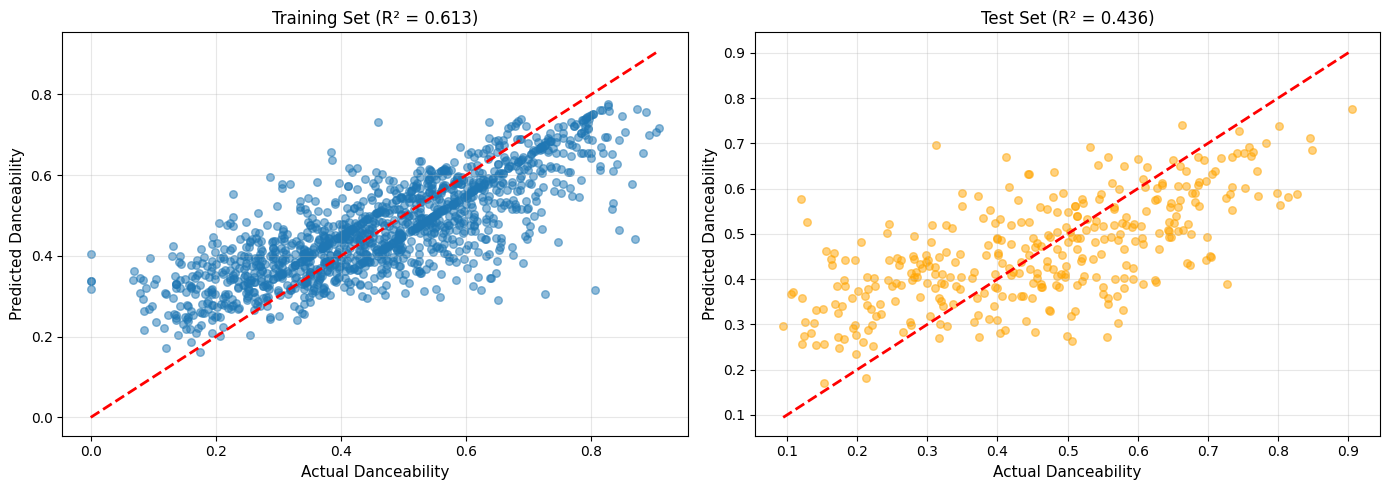

In [20]:
# Visualisation

# Actual vs Predicted Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=30)
axes[0].plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Danceability', fontsize=11)
axes[0].set_ylabel('Predicted Danceability', fontsize=11)
axes[0].set_title(f'Training Set (R² = {train_r2:.3f})', fontsize=12)
axes[0].grid(alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=30, color='orange')
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Danceability', fontsize=11)
axes[1].set_ylabel('Predicted Danceability', fontsize=11)
axes[1].set_title(f'Test Set (R² = {test_r2:.3f})', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('predictions_vs_actual.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: predictions_vs_actual.png")
plt.show()

## **Random Forest**

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestRegressor(
    n_estimators=200,      
    max_depth=20,          
    min_samples_split=5,   
    min_samples_leaf=2,    
    random_state=42,
    n_jobs=-1              
)

rf.fit(X_train, y_train)

# Get predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate R² scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Training R²: 0.8930
Test R²: 0.4633


Here the random forest model is overfitting on the training set. Let's try grid search to determine better parameters and reduce overfitting.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# More aggressive overfitting prevention
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 7, 8],              # Even shallower!
    'min_samples_split': [20, 30, 40],   # Higher thresholds
    'min_samples_leaf': [10, 15, 20],    # More samples per leaf
    'max_features': ['sqrt'],            # Only sqrt
    'max_samples': [0.7, 0.8, 0.9]       # Bootstrap sample size (KEY!)
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    rf, 
    param_grid, 
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 7, ...], 'max_features': ['sqrt'], 'max_samples': [0.7, 0.8, ...], 'min_samples_leaf': [10, 15, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [23]:
# Training the best random forest regressor
best_rf = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")

train_r2 = best_rf.score(X_train, y_train)
test_r2 = best_rf.score(X_test, y_test)

print(f"\nTraining R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Overfitting gap: {train_r2 - test_r2:.4f}")


Best parameters: {'max_depth': 8, 'max_features': 'sqrt', 'max_samples': 0.9, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 200}

Training R²: 0.6198
Test R²: 0.4549
Overfitting gap: 0.1650


It is much better!


✓ Saved: rf_predictions_vs_actual.png


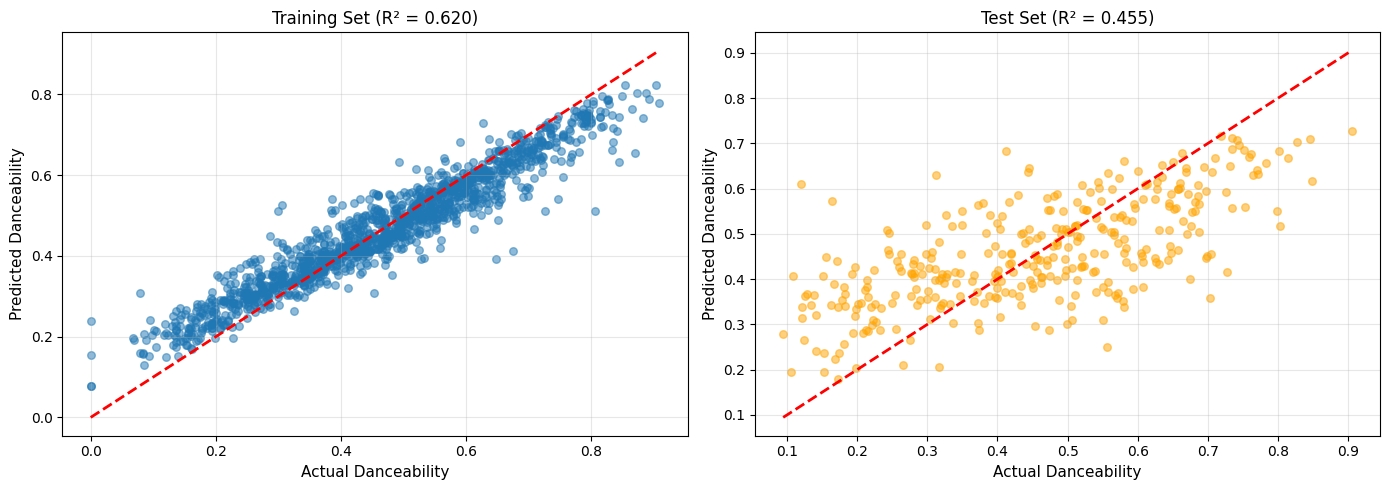

In [24]:
# Visualisation

# Actual vs Predicted Plot


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=30)
axes[0].plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Danceability', fontsize=11)
axes[0].set_ylabel('Predicted Danceability', fontsize=11)
axes[0].set_title(f'Training Set (R² = {train_r2:.3f})', fontsize=12)
axes[0].grid(alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=30, color='orange')
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Danceability', fontsize=11)
axes[1].set_ylabel('Predicted Danceability', fontsize=11)
axes[1].set_title(f'Test Set (R² = {test_r2:.3f})', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('rf_predictions_vs_actual.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: rf_predictions_vs_actual.png")
plt.show()

### Saving the random forest model

In [35]:
import joblib
import json
from datetime import datetime

print("SAVING DANCEABILITY MODEL")


# Save the trained Random Forest model
joblib.dump(best_rf, root / 'models/danceability/rf_danceability_model.pkl')
print("✓ Model saved: models/danceability/rf_danceability_model.pkl")

# Save model metadata
model_metadata = {
    'target_feature': 'danceability',
    'model_type': 'RandomForestRegressor',
    'trained_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'hyperparameters': {
        'n_estimators': 200,
        'max_depth': 8,
        'min_samples_split': 20,
        'min_samples_leaf': 10,
        'max_features': 'sqrt',
        'max_samples': 0.9,
        'random_state': 42
    },
    'performance': {
        'train_r2': float(train_r2),
        'test_r2': float(test_r2),
        'test_rmse': float(test_rmse),
        'test_mae': float(test_mae),
        'overfitting_gap': float(train_r2 - test_r2)
    },
    'training_data': {
        'n_samples': len(X_train) + len(X_test),
        'n_features': X_train.shape[1],
        'train_size': len(X_train),
        'test_size': len(X_test)
    }
}

with open(root / 'models/danceability/rf_danceability_metadata.json', 'w') as f:
    json.dump(model_metadata, f, indent=2)

print("✓ Metadata saved: models/danceability/rf_danceability_metadata.json")

SAVING DANCEABILITY MODEL
✓ Model saved: models/danceability/rf_danceability_model.pkl
✓ Metadata saved: models/danceability/rf_danceability_metadata.json
